In [1]:
import pandas as pd

# Путь к файлу
file_path = "/Users/leonid/scientific_work/data_analysis/Данные/full_data_parsed.csv"


# Загружаем в Pandas
df = pd.read_csv(file_path)
df

,history_id,age,gender,infections,main_disease,analysis_date,csf1_neutrophils,csf1_lymphocytes,glucose_csf,glucose_ratio,...,granular_bodies,albumin_blood,protein_blood,surgery_duration,reoperation_duration,reoperation,sd,liquorrhea,outcome,notes
0,16098/С2023,56,М,1,D35.3 Доброкачественное новообразование кранио...,2023-06-12,43.0,57.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN
1,16098/С2023,56,М,1,D35.3 Доброкачественное новообразование кранио...,2023-06-05,33.0,60.0,4.10,NaN,...,0.0,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN
2,16098/С2023,56,М,1,D35.3 Доброкачественное новообразование кранио...,2023-06-05,33.0,60.0,4.10,NaN,...,0.0,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN
3,20743/С2024,55,Ж,1,G50.0 Невралгия тройничного нерва,2024-07-12,83.0,17.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN
4,20743/С2024,55,Ж,1,G50.0 Невралгия тройничного нерва,2024-07-12,83.0,17.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2136/С2023,54,М,1,"G00.8 1, вызванный другими бактериями",2023-01-27,12.0,85.0,2.48,0.521,...,0.0,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
917,2136/С2023,54,М,1,"G00.8 1, вызванный другими бактериями",2023-02-02,15.0,83.0,3.11,0.555,...,0.0,42.44,61.77,NaN,NaN,1,1,NaN,NaN,NaN
918,2136/С2023,54,М,1,"G00.8 1, вызванный другими бактериями",2023-02-10,0.0,100.0,3.68,NaN,...,0.0,49.83,67.26,NaN,NaN,1,1,NaN,NaN,NaN
919,2211/С2020,30,Ж,1,D33.3 Доброкачественное новообразование черепн...,2020-02-11,NaN,17.0,3.11,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN


In [27]:
# Проверка нормальности распределения в группах
import scipy.stats as stats

# Префильтрация: оставляем только уникальные строки по ключевым параметрам
df_f = df.drop_duplicates(subset=["history_id", "gender", "age", "sd", "reoperation"]).copy()

# Обработка gender перед вычислениями (замена "Ж" → 1, "М" → 2)
df_f["gender"] = df_f["gender"].map({"Ж": 1, "М": 2}).astype(int)

# Разделяем данные на две группы
df_nm = df_f[df_f["infections"] == 2]  # Пациенты с НМ
df_no_nm = df_f[df_f["infections"] == 1]  # Пациенты без НМ

# Функция для проверки нормальности распределения
def check_normality(df_group, group_name):
    print(f"\n Проверка нормальности для группы: {group_name}\n")
    
    for column in ["age", "gender", "sd", "reoperation"]:  
        if column in df_group.columns:
            stat, p = stats.shapiro(df_group[column].dropna())  # Shapiro-Wilk test
            result = "✅ Нормальное распределение" if p > 0.05 else "❌ НЕ нормальное распределение"
            print(f"📌 {column}: p-value = {p:.5f} → {result}")

# Проверяем нормальность распределения в каждой группе
check_normality(df_nm, "Пациенты с НМ")
check_normality(df_no_nm, "Пациенты без НМ")


 Проверка нормальности для группы: Пациенты с НМ

📌 age: p-value = 0.28130 → ✅ Нормальное распределение
📌 gender: p-value = 0.00000 → ❌ НЕ нормальное распределение
📌 sd: p-value = 0.00000 → ❌ НЕ нормальное распределение
📌 reoperation: p-value = 0.00000 → ❌ НЕ нормальное распределение

 Проверка нормальности для группы: Пациенты без НМ

📌 age: p-value = 0.96830 → ✅ Нормальное распределение
📌 gender: p-value = 0.00000 → ❌ НЕ нормальное распределение
📌 sd: p-value = 0.00000 → ❌ НЕ нормальное распределение
📌 reoperation: p-value = 0.00000 → ❌ НЕ нормальное распределение


In [29]:
# Оценка репрезентативности группы контроля
import scipy.stats as stats
import pandas as pd

# Префильтрация: оставляем только уникальные строки по ключевым параметрам
df_f = df.drop_duplicates(subset=["history_id"]).copy()

# Обработка gender (замена "Ж" → 1, "М" → 2)
df_f["gender"] = df_f["gender"].map({"Ж": 1, "М": 2}).astype(int)

# Разделяем данные на две группы
df_nm = df_f[df_f["infections"] == 2]  # Пациенты с НМ
df_no_nm = df_f[df_f["infections"] == 1]  # Пациенты без НМ

# Проверка репрезентативности по ВОЗРАСТУ (t-тест)
t_stat, p_age = stats.ttest_ind(df_nm["age"].dropna(), df_no_nm["age"].dropna(), equal_var=False)

# Проверка репрезентативности по КАТЕГОРИАЛЬНЫМ ПЕРЕМЕННЫМ (хи-квадрат)
def chi_square_test(column):
    contingency_table = pd.crosstab(df_f["infections"], df_f[column])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    return p

p_gender = chi_square_test("gender")  # Пол
p_sd = chi_square_test("sd")  # Сахарный диабет
p_reoperation = chi_square_test("reoperation")  # Реоперация

# Вывод результатов
print("\n Оценка репрезентативности группы контроля (без НМ) относительно группы исследования (с НМ)\n")

# Возраст (t-тест)
print(f"📌 Возраст (t-тест): p-value = {p_age:.5f} → {'✅ Группы похожи' if p_age > 0.05 else '❌ Группы отличаются'}")

# Пол, сахарный диабет, реоперация (хи-квадрат тест)
print(f"📌 Пол: p-value = {p_gender:.5f} → {'✅ Группы похожи' if p_gender > 0.05 else '❌ Группы отличаются'}")
print(f"📌 Сахарный диабет: p-value = {p_sd:.5f} → {'✅ Группы похожи' if p_sd > 0.05 else '❌ Группы отличаются'}")
print(f"📌 Реоперация: p-value = {p_reoperation:.5f} → {'✅ Группы похожи' if p_reoperation > 0.05 else '❌ Группы отличаются'}")

# Итоговый вердикт: соответствуют ли группы друг другу
if all(p > 0.05 for p in [p_age, p_gender, p_sd, p_reoperation]):
    print("\n✅ Итог: Группа контроля (без НМ) репрезентативна относительно группы исследования (с НМ).")
else:
    print("\n❌ Итог: Группа контроля (без НМ) НЕ репрезентативна относительно группы исследования (с НМ).")


 Оценка репрезентативности группы контроля (без НМ) относительно группы исследования (с НМ)

📌 Возраст (t-тест): p-value = 0.94728 → ✅ Группы похожи
📌 Пол: p-value = 1.00000 → ✅ Группы похожи
📌 Сахарный диабет: p-value = 1.00000 → ✅ Группы похожи
📌 Реоперация: p-value = 0.85218 → ✅ Группы похожи

✅ Итог: Группа контроля (без НМ) репрезентативна относительно группы исследования (с НМ).


In [2]:
# Сколько всего людей с положительным посевом
# Отбираем людей
with_df= df[(df["infections"] == 2) & (df["cultivation"] == 2)] # люди с НМ
without_df = df[(df["infections"] == 1) & (df["cultivation"] == 2)] # люди без НМ
# Подсчитываем уникальные history_id
count_with = with_df["history_id"].nunique()# люди с НМ
count_without = without_df["history_id"].nunique()# люди без НМ

# Выводим результат
print(f"Количество людей с диагнозом НМ и положительным посевом: {count_with}")
print(f"Количество людей без диагнозома НМ и положительным посевом: {count_without}")

Количество людей с диагнозом НМ и положительным посевом: 31
Количество людей без диагнозома НМ и положительным посевом: 0


In [3]:
#Определяем, какое количество пациентов подтвердили наличие инфекции по данным посева.
with_df= df[df["infections"] == 2] # люди с НМ

# Определяем максимальное значение cultivation для каждого history_id
max_cultivation_with = with_df.groupby("history_id")["cultivation"].max()
filtered_2_history_ids = max_cultivation_with[max_cultivation_with == 2].index # history_id, где максимальное значение cultivation == 2 - подтверждено
filtered_1_history_ids = max_cultivation_with[max_cultivation_with == 1].index # history_id, где максимальное значение cultivation == 1 - нет подтверждения

# history_id, где максимальное значение cultivation == 0 - не проводили
filtered_0_history_ids = max_cultivation_with[max_cultivation_with == 0].index
# Считаем количество уникальных history_id
#count_unique_ids = len(filtered_2_history_ids)
# Выводим результат
print(f"Количество пациентов, у которых подтвердили наличие инфекции по данным посева: {len(filtered_2_history_ids)}")
print(f"Количество пациентов, у которых НЕ подтвердили наличие инфекции по данным посева: {len(filtered_1_history_ids)}")
print(f"Количество пациентов, у которых не проводили посев: {len(filtered_0_history_ids)}")


Количество пациентов, у которых подтвердили наличие инфекции по данным посева: 31
Количество пациентов, у которых НЕ подтвердили наличие инфекции по данным посева: 23
Количество пациентов, у которых не проводили посев: 6


In [ ]:
import numpy as np

# Функция для расчета по американским критериям
def calculate_criteria(df, infection_status):
    """
    Фильтрует данные по инфекции и рассчитывает показатели для истории болезни.
    
    df: DataFrame - исходный датасет
    infection_status: int - статус инфекции (2 - с НМ, 1 - без НМ)
    
    Возвращает:
    - Количество пациентов, соответствующих критериям
    - Общее количество пациентов в группе
    - Индекс пациентов, попавших под критерии
    """
    # Фильтрация по инфекции
    filtered_df = df[df["infections"] == infection_status].copy()

    # Группировка и вычисление максимальных значений
    grouped = filtered_df.groupby("history_id").agg({
        "cultivation": "max",
        "temperature": "max",
        "rigidity": "max",
        "cytosis_csf": "max",
        "csf1_neutrophils": "max",
        "protein_csf": "max",
        "glucose_csf": "min"
    }).copy()

    # Вычисляем долю нейтрофилов, предотвращая деление на ноль
    grouped["neutrophils_ratio"] = np.where(
        grouped["cytosis_csf"] > 0, 
        grouped["csf1_neutrophils"] / grouped["cytosis_csf"], 
        0  # Если cytosis_csf = 0, то ratio = 0
    )

    # Определение пациентов, соответствующих американским критериям
    filtered_history = grouped[
        # 1. Выделение возбудителя - Достаточное условие (автоматическое включение)
        (grouped["cultivation"] == 2) |

        # 2. Клинические проявления (Температура > 38 или ригидность == 2) + хотя бы один лабораторный критерий
        (
            ((grouped["temperature"] > 38) | (grouped["rigidity"] == 2)) &  # Лихорадка или ригидность
            
        # 3. Любой из лабораторных критериев
            (
                ((grouped["cytosis_csf"] > 4) & (grouped["neutrophils_ratio"] >= 0.5)) |  # Повышенные лейкоциты с нейтрофилами
                (grouped["protein_csf"] > 0.33) |  # Повышенный белок
                (grouped["glucose_csf"] < 2.8)  # Снижение глюкозы
            )
        )
    ].index
    return len(filtered_history), len(grouped), filtered_history


# **Расчет чувствительности (Sensitivity)**
a, total_with_nm, filtered_with_nm = calculate_criteria(df, 2)
b = total_with_nm - a  # Ложно отрицательные

sensitivity = a / (a + b) * 100 if (a + b) != 0 else 100

print(f"✅ Количество пациентов с НМ, соответствующих американским критериям: {a} из {total_with_nm}")
print(f"🎯 ЧУВСТВИТЕЛЬНОСТЬ американских критериев = {sensitivity:.2f}%\n")


# **Расчет специфичности (Specificity)**
c, total_without_nm, filtered_without_nm = calculate_criteria(df, 1)
d = total_without_nm - c  # Истинно отрицательные

specificity = d / (c + d) * 100 if (c + d) != 0 else 100

print(f"✅ Количество пациентов без НМ, соответствующих американским критериям: {c} из {total_without_nm}")
print(f"🎯 СПЕЦИФИЧНОСТЬ американских критериев = {specificity:.2f}%")

✅ Количество пациентов с НМ, соответствующих американским критериям: 49 из 60
🎯 ЧУВСТВИТЕЛЬНОСТЬ американских критериев = 81.67%

✅ Количество пациентов без НМ, соответствующих американским критериям: 10 из 60
🎯 СПЕЦИФИЧНОСТЬ американских критериев = 83.33%


In [5]:
# Функция для расчета русских критериев вероятного НМ
def calculate_criteria(df, infection_status):
    """
    Фильтрует данные по инфекции и рассчитывает показатели для истории болезни.
    
    df: DataFrame - исходный датасет
    infection_status: int - статус инфекции (2 - с НМ, 1 - без НМ)
    
    Возвращает:
    - Количество пациентов, соответствующих критериям
    - Общее количество пациентов в группе
    """
    # Фильтрация по инфекции
    filtered_df = df[df["infections"] == infection_status].copy()

    # Группировка и вычисление максимальных значений
    grouped = filtered_df.groupby("history_id").agg({
        "cultivation": "max",
        "temperature": "max",
        "rigidity": "max",
        "cytosis_csf": "max",
        "glucose_csf": "min",
        "glucose_ratio": "max",
        "lactate_csf": "max"
    }).copy()

    # Определение пациентов, соответствующих критериям
    filtered_history = grouped[
        # 1. **Выделение возбудителя – это достаточный критерий**
        (grouped["cultivation"] == 2) |

        # 2. **Клинические критерии (температура >38, ригидность или Na < 135)**
        (
            ((grouped["temperature"] > 38) | 
             (grouped["rigidity"] == 2)) &

            # 3. **Хотя бы одно из лабораторных изменений**
            (
                (grouped["cytosis_csf"] > 65) |
                (grouped["glucose_csf"] < 2.6) |
                (grouped["glucose_ratio"] <= 0.45) |
                (grouped["lactate_csf"] > 4.2)
            )
        )
    ].index

    return len(filtered_history), len(grouped)


# **Расчет чувствительности (Sensitivity)**
a, total_with_nm = calculate_criteria(df, 2)
b = total_with_nm - a  # Ложно отрицательные

sensitivity = a / (a + b) * 100 if (a + b) != 0 else 100

print(f"✅ Количество пациентов с НМ, соответствующих русским критериям вероятного НМ: {a} из {total_with_nm}")
print(f"🎯 ЧУВСТВИТЕЛЬНОСТЬ русских вероятных критериев = {sensitivity:.2f}%\n")


# **Расчет специфичности (Specificity)**
c, total_without_nm = calculate_criteria(df, 1)
d = total_without_nm - c  # Истинно отрицательные

specificity = d / (c + d) * 100 if (c + d) != 0 else 100

print(f"✅ Количество пациентов без НМ, соответствующих русским критериям вероятного НМ: {c} из {total_without_nm}")
print(f"🎯 СПЕЦИФИЧНОСТЬ русских вероятных критериев = {specificity:.2f}%")

✅ Количество пациентов с НМ, соответствующих русским критериям вероятного НМ: 49 из 60
🎯 ЧУВСТВИТЕЛЬНОСТЬ русских вероятных критериев = 81.67%

✅ Количество пациентов без НМ, соответствующих русским критериям вероятного НМ: 7 из 60
🎯 СПЕЦИФИЧНОСТЬ русских вероятных критериев = 88.33%


In [30]:
# Функция для анализа соответствия русским критериям подтвержденного НМ
def analyze_russian_criteria(df, infection_status):
    """
    Фильтрует пациентов и определяет, какие из них соответствуют русским критериям.

    :param df: DataFrame с данными пациентов
    :param infection_status: 2 - пациенты с НМ, 1 - пациенты без НМ
    :return: Список пациентов, соответствующих критериям, и общее количество пациентов
    """

    # Фильтруем только пациентов с указанным типом инфекции
    filtered_df = df[df["infections"] == infection_status]

    # Группируем и вычисляем максимальные значения по history_id
    grouped = filtered_df.groupby("history_id").agg({
        "cultivation": "max",
        "temperature": "max",
        "rigidity": "max"
    })

    # Группируем, считая количество случаев превышения порогов
    cytosis_csf = filtered_df[filtered_df["cytosis_csf"] > 65].groupby("history_id").size()
    glucose_csf = filtered_df[filtered_df["glucose_csf"] < 2.6].groupby("history_id").size()
    glucose_ratio = filtered_df[filtered_df["glucose_ratio"] <= 0.45].groupby("history_id").size()
    actate_csf = filtered_df[filtered_df["lactate_csf"] > 4.2].groupby("history_id").size()

    # Фильтруем истории, соответствующие русским критериям
    filtered_history = grouped.index[
        (grouped["cultivation"] == 2) |
        ((grouped["temperature"] > 38) & (cytosis_csf.get(grouped.index, 0) >= 2)) |
        ((grouped["temperature"] > 38) & (glucose_csf.get(grouped.index, 0) >= 2)) |
        ((grouped["temperature"] > 38) & (glucose_ratio.get(grouped.index, 0) >= 2)) |
        ((grouped["temperature"] > 38) & (actate_csf.get(grouped.index, 0) >= 2)) |
        ((grouped["rigidity"] == 2) & (cytosis_csf.get(grouped.index, 0) >= 2)) |
        ((grouped["rigidity"] == 2) & (glucose_csf.get(grouped.index, 0) >= 2)) |
        ((grouped["rigidity"] == 2) & (glucose_ratio.get(grouped.index, 0) >= 2)) |
        ((grouped["rigidity"] == 2) & (actate_csf.get(grouped.index, 0) >= 2))
    ]

    return len(filtered_history), len(grouped)


# Анализ пациентов с НМ (Чувствительность)
a, total_nm = analyze_russian_criteria(df, 2)
b = total_nm - a  # Ложно отрицательные (диагноз НМ + критерии НЕ совпадают)
sensitivity = a / (a + b) * 100 if (a + b) != 0 else 100

# Анализ пациентов без НМ (Специфичность)
c, total_nm= analyze_russian_criteria(df, 1)
d = total_nm - c  # Истинно отрицательные (диагноза НМ нет + критерии НЕ совпадают)
specificity = d / (c + d) * 100 if (c + d) != 0 else 100

# Вывод результатов**
print(f"✅ Количество пациентов с НМ, соответствующих русским критериям подтвержденного НМ: {a} из {total_nm}")
print(f"🎯 Это {a / total_nm * 100:.2f}% от общего числа пациентов")
print(f"🎯 Чувствительность русских критериев = {sensitivity:.2f}%\n")

print(f"✅ Количество пациентов без НМ, подпадающих под русские критерии подтвержденного НМ: {c} из {total_nm}")
print(f"🎯 Это {c / total_nm * 100:.2f}% от общего числа пациентов")
print(f"🎯 Специфичность русских критериев = {specificity:.2f}%")


✅ Количество пациентов с НМ, соответствующих русским критериям подтвержденного НМ: 31 из 60
🎯 Это 51.67% от общего числа пациентов
🎯 Чувствительность русских критериев = 51.67%

✅ Количество пациентов без НМ, подпадающих под русские критерии подтвержденного НМ: 0 из 60
🎯 Это 0.00% от общего числа пациентов
🎯 Специфичность русских критериев = 100.00%


In [31]:
#Рассчет чувтвительности и специфичности каждого из критериев 

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Истинные метки диагноза
true_labels = (df["infections"] == 2).astype(int)

# Упрощённая функция: проверка ≥ 2 раз по критерию
def repeated_abnormal(group, mask):
    count = group[mask].groupby(group["history_id"]).size()
    selected_ids = count[count >= 2].index
    return group["history_id"].isin(selected_ids)

# Доля нейтрофилов
df["neutrophils_ratio"] = df["csf1_neutrophils"] / df["cytosis_csf"]

# Критерии по системам
criteria_sets = {
    "CDC": {
        "Посев": df["cultivation"] == 2,
        "Температура": df["temperature"] > 38,
        "Ригидность": df["rigidity"] == 2,
        "Цитоз >4 + нейтрофилов >50%": (df["cytosis_csf"] > 4) & (df["neutrophils_ratio"] >= 0.5),
        "Белок > 0.33": df["protein_csf"] > 0.33,
        "Глюкоза < 2.8": df["glucose_csf"] < 2.8
    },
    "Вероятный НМ по Н. В. Курдюмовой": {
        "Посев": df["cultivation"] == 2,
        "Температура": df["temperature"] > 38,
        "Ригидность": df["rigidity"] == 2,
        "Цитоз > 65": df["cytosis_csf"] > 65,
        "Глюкоза < 2.6": df["glucose_csf"] < 2.6,
        "CSF/SGLU ≤ 0.45": df["glucose_ratio"] <= 0.45,
        "Лактат > 4.2": df["lactate_csf"] > 4.2
    },
    "Подтвержденный НМ по Н. В. Курдюмовой": {
        "Посев": df["cultivation"] == 2,
        "Температура ": df["temperature"] > 38,
        "Ригидность": df["rigidity"] == 2,
        "Цитоз > 65 (повторно)": repeated_abnormal(df, df["cytosis_csf"] > 65),
        "Глюкоза < 2.6 (повторно)": repeated_abnormal(df, df["glucose_csf"] < 2.6),
        "CSF/SGLU ≤ 0.45 (повторно)": repeated_abnormal(df, df["glucose_ratio"] <= 0.45),
        "Лактат > 4.2 (повторно)": repeated_abnormal(df, df["lactate_csf"] > 4.2)
    }
}

# Расчёт показателей
results = []

for system, criteria_dict in criteria_sets.items():
    for label, condition in criteria_dict.items():
        predicted = condition.astype(int)
        tn, fp, fn, tp = confusion_matrix(true_labels, predicted, labels=[0, 1]).ravel()

        sensitivity = tp / (tp + fn) if (tp + fn) else np.nan
        specificity = tn / (tn + fp) if (tn + fp) else np.nan
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        results.append({
            "Система": system,
            "Критерий": label,
            "Чувствительность (%)": round(sensitivity * 100, 1),
            "Специфичность (%)": round(specificity * 100, 1),
            "Точность (%)": round(accuracy * 100, 1)
        })

# Формируем таблицу
results_df = pd.DataFrame(results)
results_df = results_df.reset_index(drop=True)

# Новый столбец по умолчанию — "—"
results_df["Максимальный показатель"] = "—"

# Обрабатываем по группам (системам)
for system_name, group in results_df.groupby("Система"):
    idx_sens = group["Чувствительность (%)"].idxmax()
    idx_spec = group["Специфичность (%)"].idxmax()

    if idx_sens == idx_spec:
        results_df.loc[idx_sens, "Максимальный показатель"] = "Оба"
    else:
        results_df.loc[idx_sens, "Максимальный показатель"] = "Лучшая чувствительность"
        results_df.loc[idx_spec, "Максимальный показатель"] = "Лучшая специфичность"

# Вывод
from IPython.display import display
display(results_df)

,Система,Критерий,Чувствительность (%),Специфичность (%),Точность (%),Максимальный показатель
0,CDC,Посев,69.2,100.0,79.6,Лучшая специфичность
1,CDC,Температура,20.5,96.8,46.3,—
2,CDC,Ригидность,53.6,92.6,66.8,—
3,CDC,Цитоз >4 + нейтрофилов >50%,27.5,58.2,37.9,—
4,CDC,Белок > 0.33,83.6,21.5,62.6,Лучшая чувствительность
5,CDC,Глюкоза < 2.8,34.4,91.0,53.5,—
6,Вероятный НМ по Н. В. Курдюмовой,Посев,69.2,100.0,79.6,Оба
7,Вероятный НМ по Н. В. Курдюмовой,Температура,20.5,96.8,46.3,—
8,Вероятный НМ по Н. В. Курдюмовой,Ригидность,53.6,92.6,66.8,—
9,Вероятный НМ по Н. В. Курдюмовой,Цитоз > 65,64.4,65.6,64.8,—


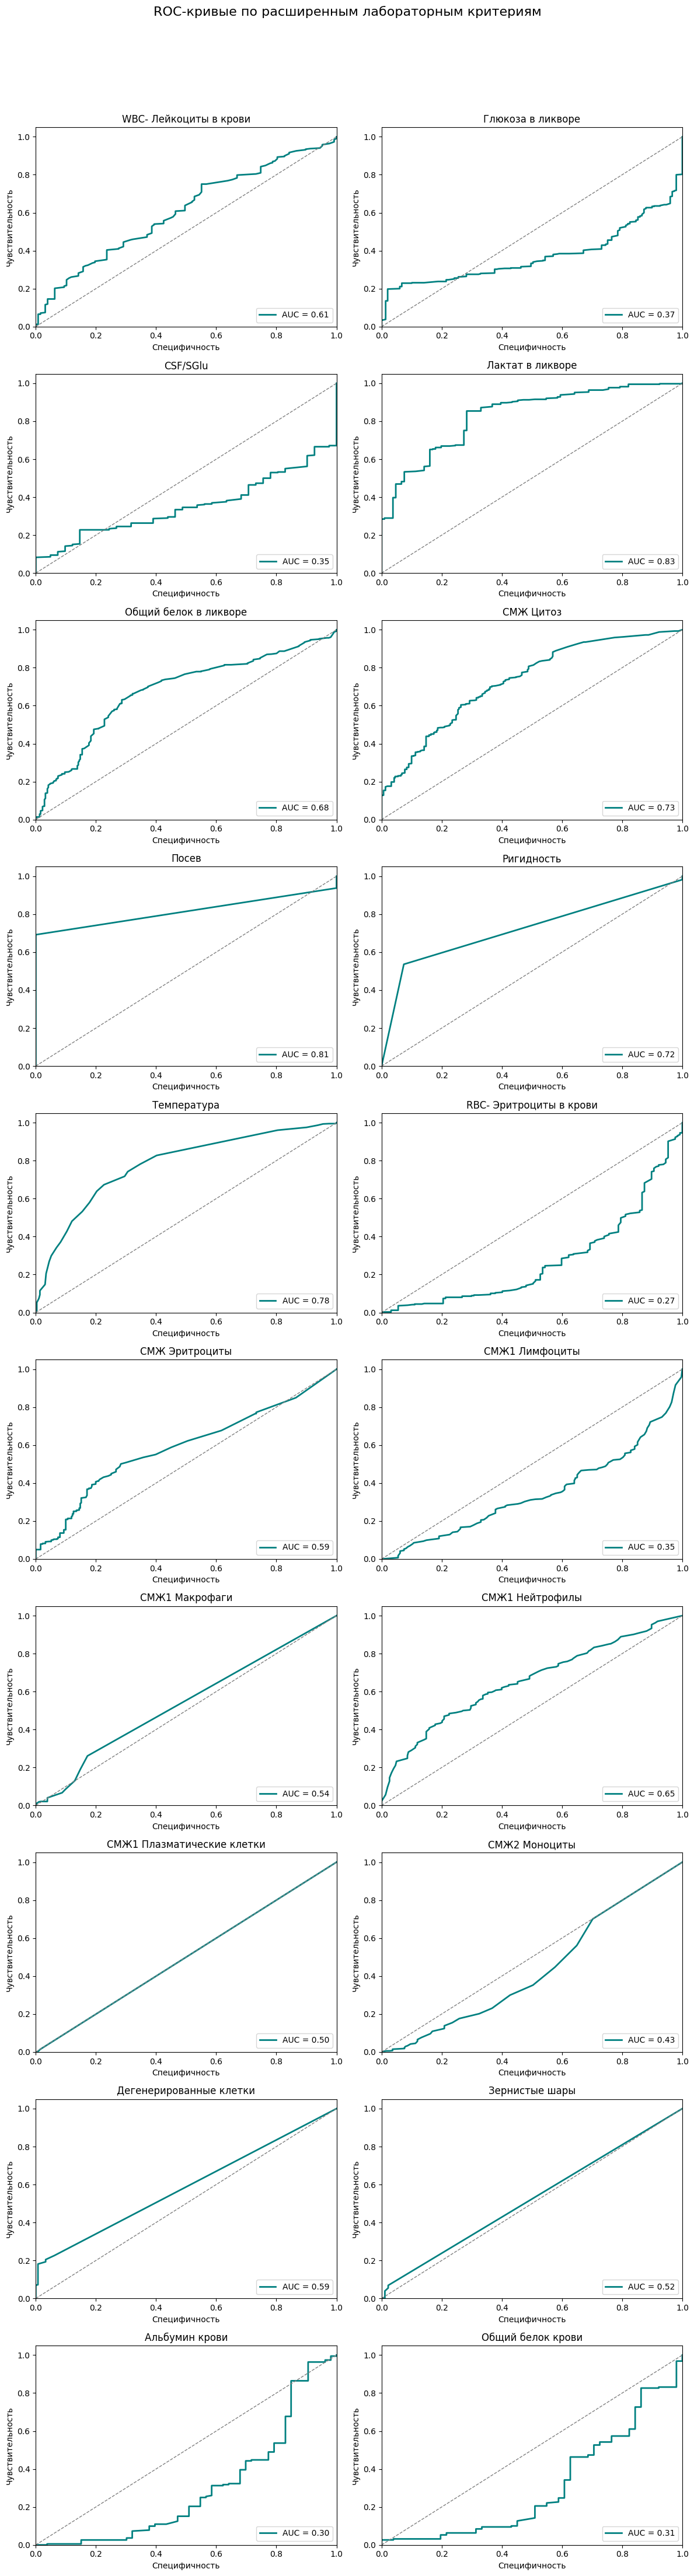

,Критерий,AUC,Оценка AUC,Оптимальное значение
3,Лактат в ликворе,0.83,🟢 Хорошая,2.8
6,Посев,0.81,🟢 Хорошая,2
8,Температура,0.78,🟡 Удовлетворительная,37.1
5,СМЖ Цитоз,0.73,🟡 Удовлетворительная,101
7,Ригидность,0.72,🟡 Удовлетворительная,2
4,Общий белок в ликворе,0.68,🔴 Слабая,0.8
13,СМЖ1 Нейтрофилы,0.65,🔴 Слабая,69
0,WBC- Лейкоциты в крови,0.61,🔴 Слабая,8
16,Дегенерированные клетки,0.59,🔴 Слабая,4
10,СМЖ Эритроциты,0.59,🔴 Слабая,768


In [8]:
# Рисуем ROC кривые и считаем AUC для всех имеющихся показателей

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings

# Истинные метки
true_labels = (df["infections"] == 2).astype(int)

# Критерии: название для вывода → имя переменной в df
criteria_dict = {
    "WBC- Лейкоциты в крови": "wbc",
    "Глюкоза в ликворе": "glucose_csf",
    "CSF/SGlu": "glucose_ratio",
    "Лактат в ликворе": "lactate_csf",
    "Общий белок в ликворе": "protein_csf",
    "СМЖ Цитоз": "cytosis_csf",
    "Посев": "cultivation",
    "Ригидность": "rigidity",
    "Температура": "temperature",
    "RBC- Эритроциты в крови": "rbc_blood",
    "СМЖ Эритроциты": "rbc_csf",
    "СМЖ1 Лимфоциты": "csf1_lymphocytes",
    "СМЖ1 Макрофаги": "csf1_macrophages",
    "СМЖ1 Нейтрофилы": "csf1_neutrophils",
    "СМЖ1 Плазматические клетки": "csf1_plasma_cells",
    "СМЖ2 Моноциты": "csf2_monocytes",
    "Дегенерированные клетки": "degenerative_cells",
    "Зернистые шары": "granular_bodies",
    "Альбумин крови": "albumin_blood",
    "Общий белок крови": "protein_blood"
}

# Таблица результатов
roc_table = []

# Построение графиков
rows = (len(criteria_dict) + 1) // 2
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 4.5 * rows))
fig.suptitle("ROC-кривые по расширенным лабораторным критериям", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, (label, varname) in zip(axes.flatten(), criteria_dict.items()):
    if varname not in df.columns:
        ax.set_visible(False)
        continue

    scores = df[varname].astype(float)
    valid_idx = ~scores.isna()
    y_true_valid = true_labels[valid_idx]
    y_score_valid = scores[valid_idx]

    if valid_idx.sum() < 2 or y_score_valid.nunique() <= 1 or y_true_valid.nunique() < 2:
        ax.set_visible(False)
        continue

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        fpr, tpr, thresholds = roc_curve(y_true_valid, y_score_valid)
        roc_auc = auc(fpr, tpr)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    def format_val(val):
        if not np.isfinite(val):
            return "н/д"
        return str(int(val)) if float(val).is_integer() else f"{val:.1f}"

    ax.plot(fpr, tpr, color="teal", lw=2, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("Специфичность")
    ax.set_ylabel("Чувствительность")
    ax.set_title(label)
    ax.legend(loc="lower right")

    roc_table.append({
        "Критерий": label,
        "AUC": round(roc_auc, 2),
        "Оптимальное значение": format_val(optimal_threshold)
    })

# Убираем лишние пустые оси
for extra_ax in axes.flatten()[len(criteria_dict):]:
    extra_ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Оценка AUC
def auc_quality(value):
    if value >= 0.9:
        return "🔵 Отличная"
    elif value >= 0.8:
        return "🟢 Хорошая"
    elif value >= 0.7:
        return "🟡 Удовлетворительная"
    else:
        return "🔴 Слабая"

# Таблица результатов
roc_df = pd.DataFrame(roc_table)
roc_df["Оценка AUC"] = roc_df["AUC"].apply(auc_quality)
roc_df = roc_df[["Критерий", "AUC", "Оценка AUC", "Оптимальное значение"]]

# Вывод
display(roc_df.sort_values("AUC", ascending=False))

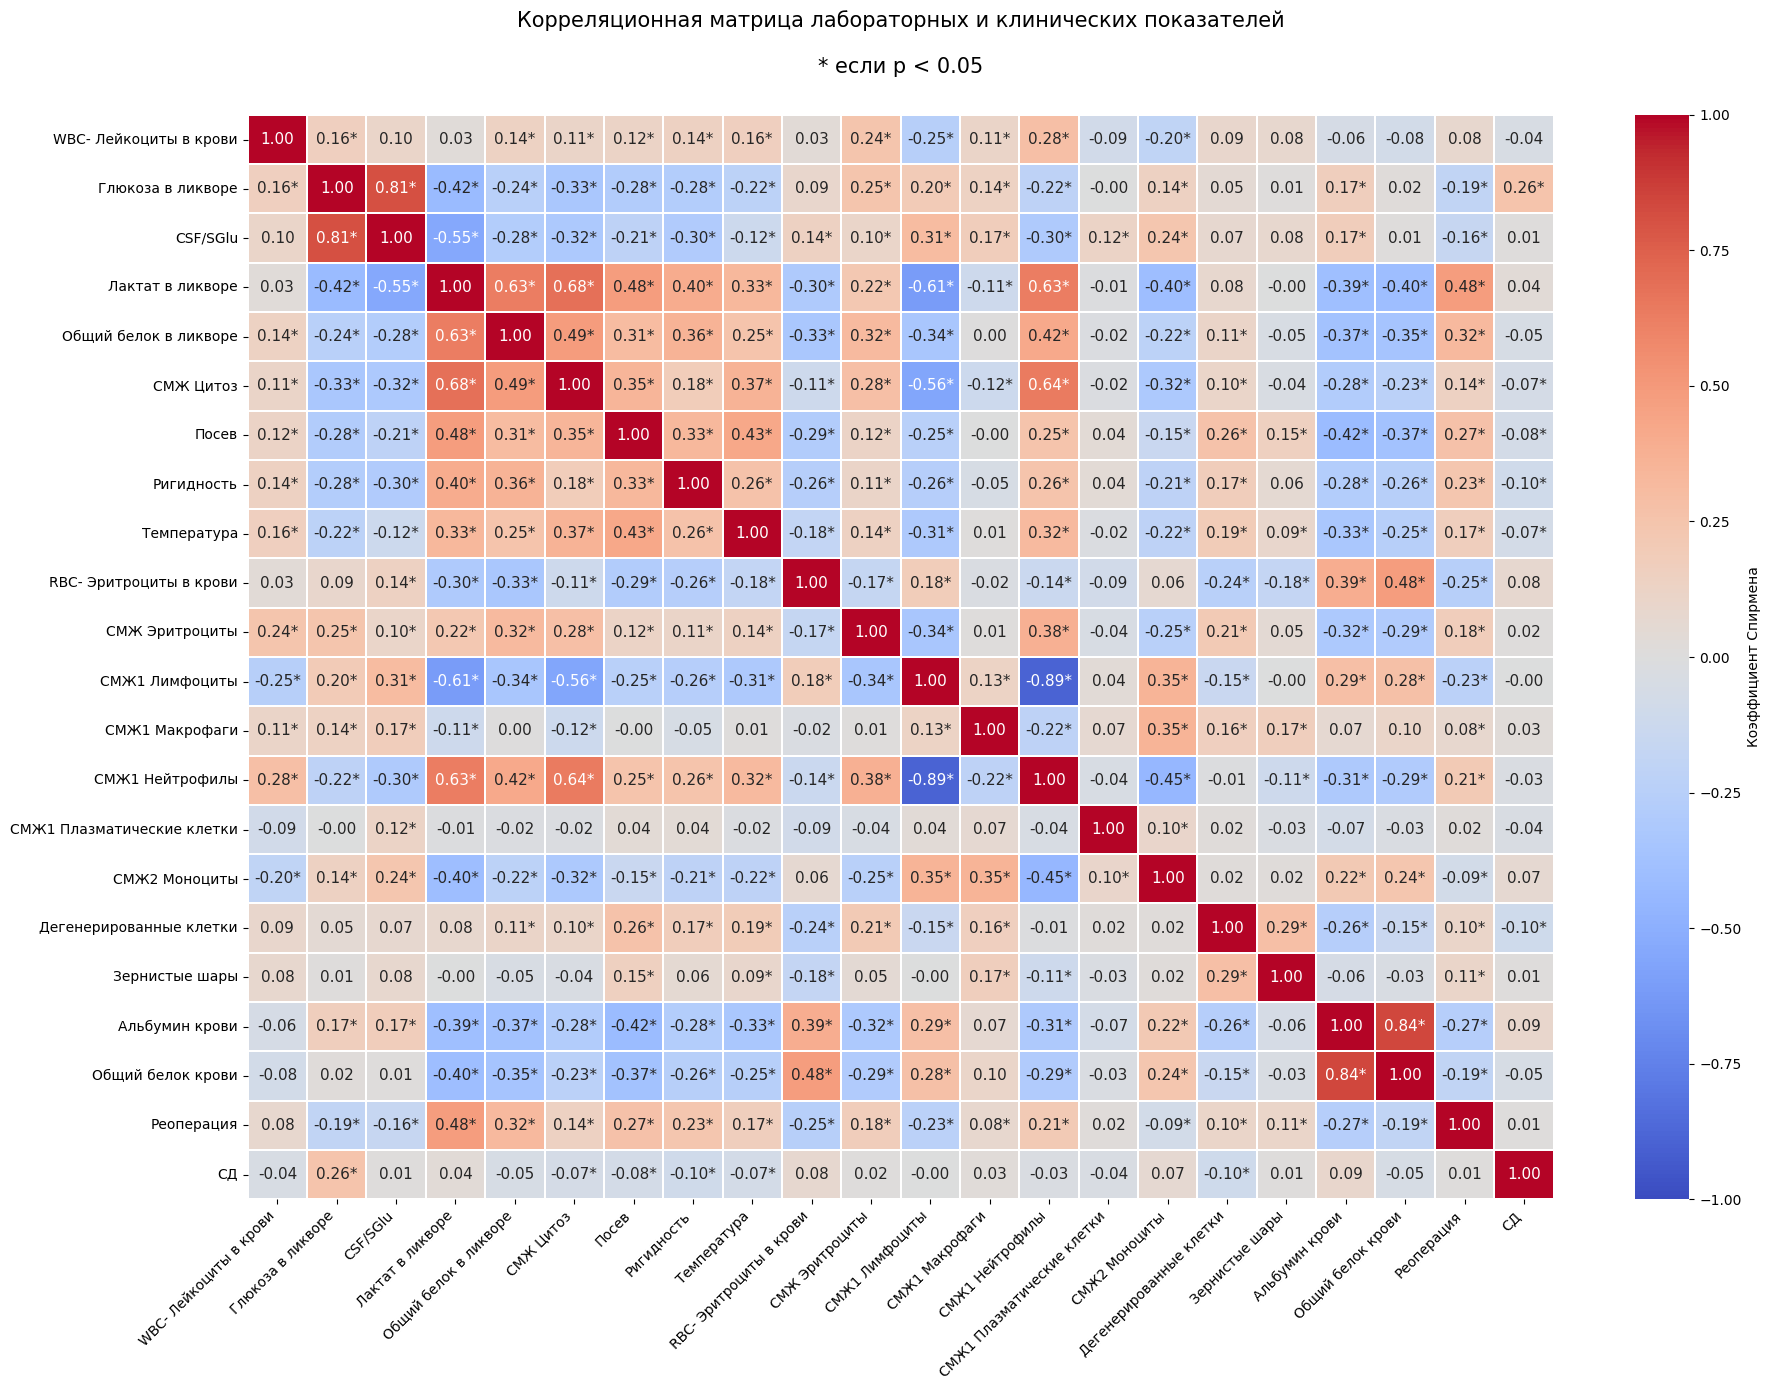

In [33]:
# Строим корреляционную матрицу лабораторных и клинических показателей по Спирмену
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Словарь: Русское название → название переменной в df
variables = {
    "WBC- Лейкоциты в крови": "wbc",
    "Глюкоза в ликворе": "glucose_csf",
    "CSF/SGlu": "glucose_ratio",
    "Лактат в ликворе": "lactate_csf",
    "Общий белок в ликворе": "protein_csf",
    "СМЖ Цитоз": "cytosis_csf",
    "Посев": "cultivation",
    "Ригидность": "rigidity",
    "Температура": "temperature",
    "RBC- Эритроциты в крови": "rbc_blood",
    "СМЖ Эритроциты": "rbc_csf",
    "СМЖ1 Лимфоциты": "csf1_lymphocytes",
    "СМЖ1 Макрофаги": "csf1_macrophages",
    "СМЖ1 Нейтрофилы": "csf1_neutrophils",
    "СМЖ1 Плазматические клетки": "csf1_plasma_cells",
    "СМЖ2 Моноциты": "csf2_monocytes",
    "Дегенерированные клетки": "degenerative_cells",
    "Зернистые шары": "granular_bodies",
    "Альбумин крови": "albumin_blood",
    "Общий белок крови": "protein_blood",
    "Реоперация": "reoperation",
    "СД": "sd"
}

# Подготовка датафрейма с нужными переменными
selected_df = df[[v for v in variables.values() if v in df.columns]].copy()
selected_df.columns = [k for k, v in variables.items() if v in df.columns]

columns = selected_df.columns
n = len(columns)

# Создание матриц корреляции и p-value
corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=columns, index=columns)
pval_matrix = pd.DataFrame(np.ones((n, n)), columns=columns, index=columns)

for i in range(n):
    for j in range(n):
        col1 = columns[i]
        col2 = columns[j]
        x = selected_df[col1]
        y = selected_df[col2]
        mask = x.notna() & y.notna()
        if mask.sum() > 2:
            r, p = spearmanr(x[mask], y[mask])
            corr_matrix.iloc[i, j] = r
            pval_matrix.iloc[i, j] = p
        else:
            corr_matrix.iloc[i, j] = np.nan
            pval_matrix.iloc[i, j] = np.nan

# Формируем матрицу аннотаций (значения + звезда, если p < 0.05)
annot_matrix = pd.DataFrame('', index=columns, columns=columns)
for i in range(n):
    for j in range(n):
        r = corr_matrix.iloc[i, j]
        p = pval_matrix.iloc[i, j]
        if pd.isnull(r):
            annot_matrix.iloc[i, j] = ""
        else:
            # аккуратный пробел перед звездой, если p < 0.05 и не диагональ
            annot_matrix.iloc[i, j] = f"{r:.2f}" + ("*" if (p is not None and p < 0.05 and i != j) else "")

# Визуализация
plt.figure(figsize=(19, 14))  # широкая, чтобы не слипалось

sns.heatmap(
    corr_matrix.astype(float),
    annot=annot_matrix.values,
    fmt='',
    cmap="coolwarm",         # насыщенность цвета сохраняется!
    vmin=-1, vmax=1,         # чтобы крайние значения были насыщенными
    square=False,            # автоматически подстраивает клетки
    linewidths=0.3,          # узкие белые линии между клетками
    linecolor='white',
    cbar_kws={'label': 'Коэффициент Спирмена'},
    annot_kws={"size": 11},  # маленький аккуратный шрифт
)

plt.title("Корреляционная матрица лабораторных и клинических показателей\n\n* если p < 0.05", fontsize=15, pad=30)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



In [ ]:
# Таблица с коэффициентами Спирмена и p-values для всех показателей
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Словарь: Русское название → название переменной в df
variables = {
    "WBC- Лейкоциты в крови": "wbc",
    "Глюкоза в ликворе": "glucose_csf",
    "CSF/SGlu": "glucose_ratio",
    "Лактат в ликворе": "lactate_csf",
    "Общий белок в ликворе": "protein_csf",
    "СМЖ Цитоз": "cytosis_csf",
    "Посев": "cultivation",
    "Ригидность": "rigidity",
    "Температура": "temperature",
    "RBC- Эритроциты в крови": "rbc_blood",
    "СМЖ Эритроциты": "rbc_csf",
    "СМЖ1 Лимфоциты": "csf1_lymphocytes",
    "СМЖ1 Макрофаги": "csf1_macrophages",
    "СМЖ1 Нейтрофилы": "csf1_neutrophils",
    "СМЖ1 Плазматические клетки": "csf1_plasma_cells",
    "СМЖ2 Моноциты": "csf2_monocytes",
    "Дегенерированные клетки": "degenerative_cells",
    "Зернистые шары": "granular_bodies",
    "Альбумин крови": "albumin_blood",
    "Общий белок крови": "protein_blood",
    "Реоперация": "reoperation",
    "СД": "sd"
}

# Подготовка датафрейма с нужными переменными
selected_df = df[[v for v in variables.values() if v in df.columns]].copy()
selected_df.columns = [k for k, v in variables.items() if v in df.columns]

columns = selected_df.columns
n = len(columns)

# Cборка таблицы p-values
rows = []

for i in range(n):
    for j in range(n):
        col1 = columns[i]
        col2 = columns[j]
        x = selected_df[col1]
        y = selected_df[col2]
        mask = x.notna() & y.notna()
        if mask.sum() > 2:
            r, p = spearmanr(x[mask], y[mask])
            rows.append({
                "Переменная 1": col1,
                "Переменная 2": col2,
                "r": round(r, 6),
                "p-value": round(p, 6),
                "чек": "✅" if p < 0.05 else "❌"
            })
        else:
            rows.append({
                "Переменная 1": col1,
                "Переменная 2": col2,
                "r": np.nan,
                "p-value": np.nan,
                "чек": "❌"
            })

pval_table = pd.DataFrame(rows)

display(pval_table.head(20))
# Для сохранения
# pval_table.to_excel("pval_table.xlsx", index=False)



,Переменная 1,Переменная 2,r,p-value,чек
0,WBC- Лейкоциты в крови,WBC- Лейкоциты в крови,1.000000,0.000000,✅
1,WBC- Лейкоциты в крови,Глюкоза в ликворе,0.157718,0.004369,✅
2,WBC- Лейкоциты в крови,CSF/SGlu,0.102331,0.110102,❌
3,WBC- Лейкоциты в крови,Лактат в ликворе,0.027154,0.655699,❌
4,WBC- Лейкоциты в крови,Общий белок в ликворе,0.138664,0.002941,✅
5,WBC- Лейкоциты в крови,СМЖ Цитоз,0.110256,0.018515,✅
6,WBC- Лейкоциты в крови,Посев,0.119853,0.009764,✅
7,WBC- Лейкоциты в крови,Ригидность,0.143761,0.001906,✅
8,WBC- Лейкоциты в крови,Температура,0.163495,0.000498,✅
9,WBC- Лейкоциты в крови,RBC- Эритроциты в крови,0.031570,0.497529,❌


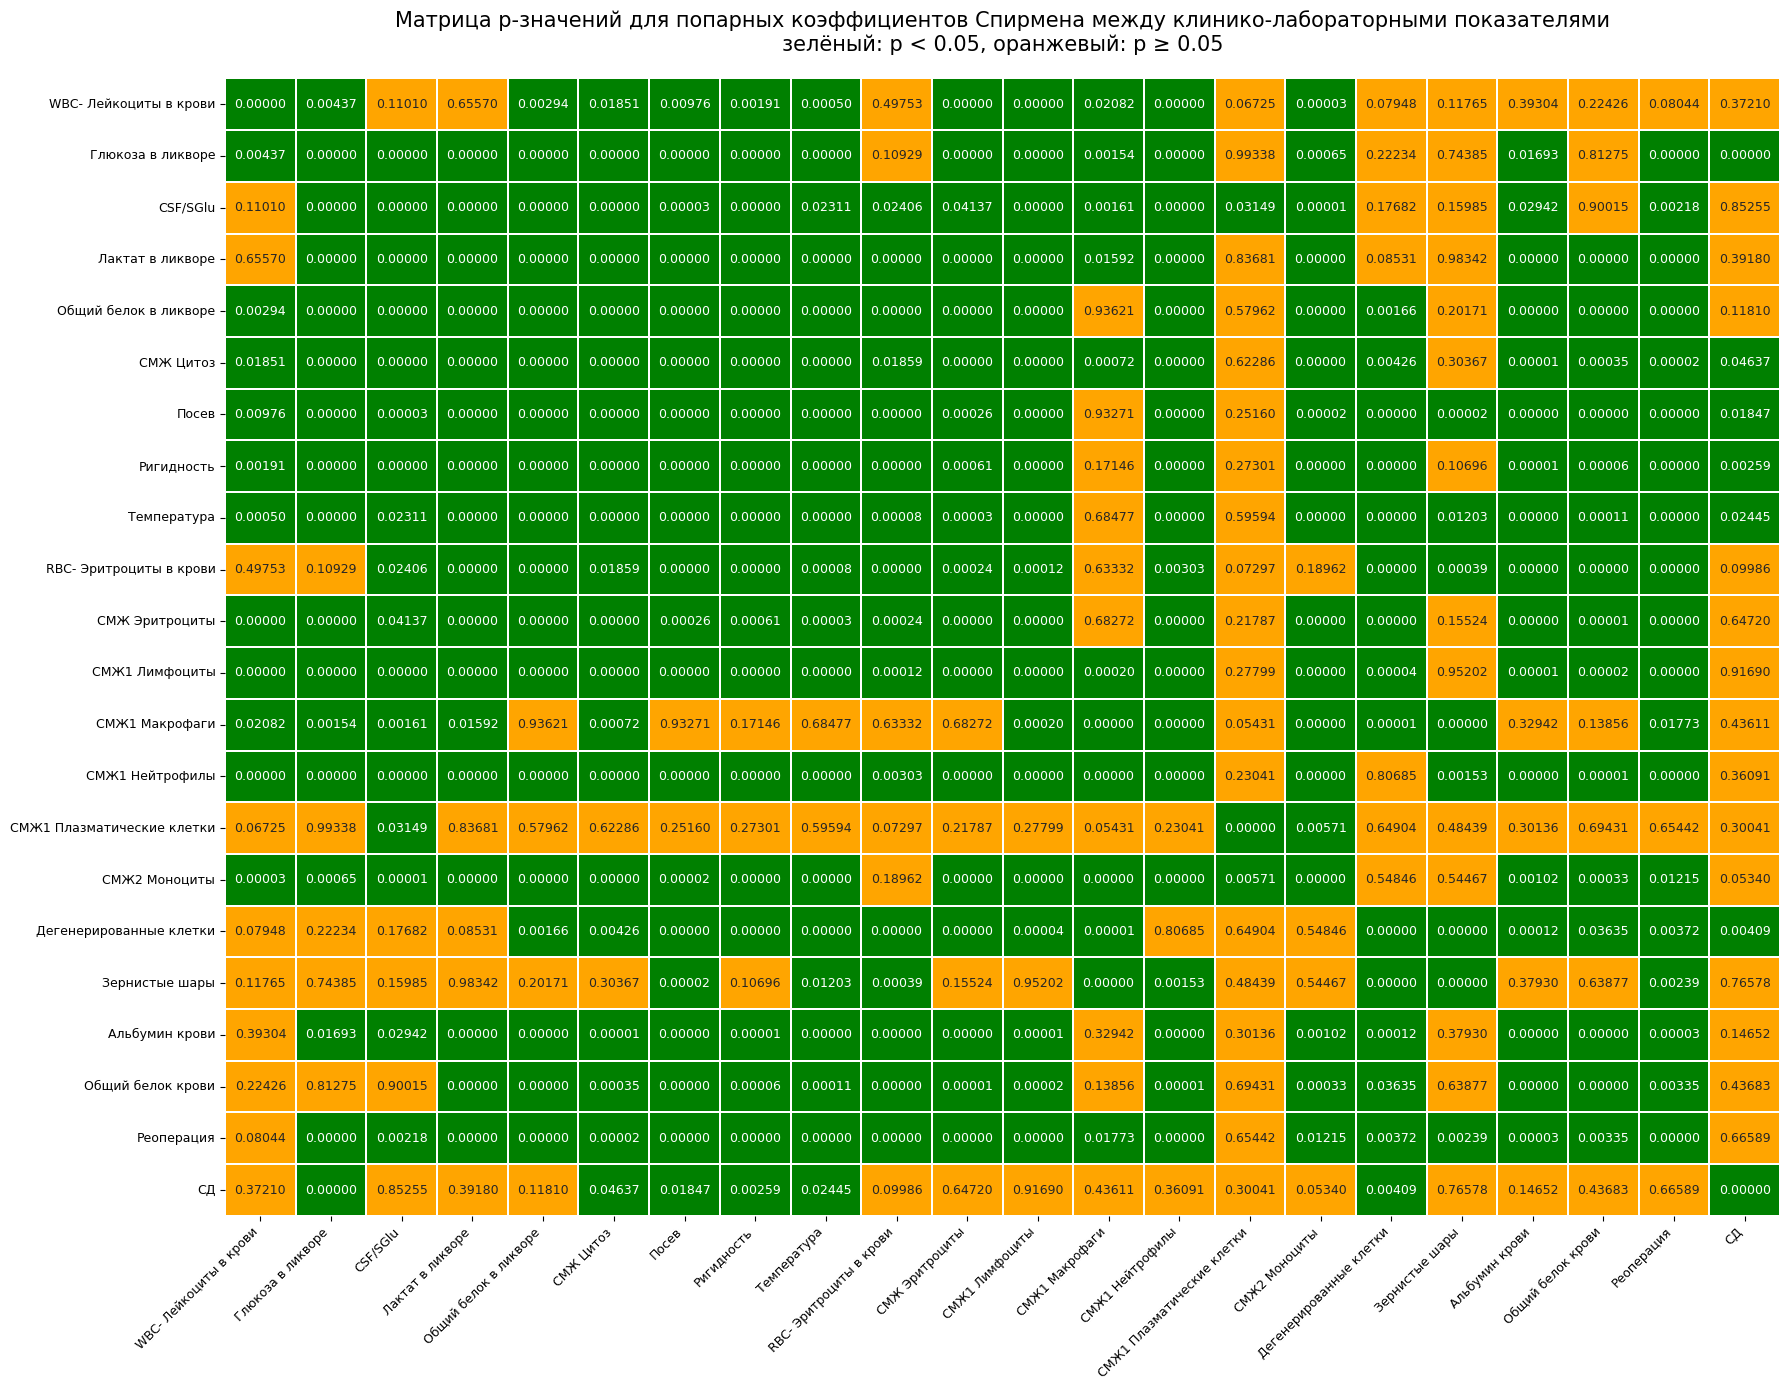

In [38]:
# По просьбе рецензента - матрица p-значений для попарных коэффициентов Спирмена между клинико-лабораторными показателями
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Словарь: Русское название → название переменной в df
variables = {
    "WBC- Лейкоциты в крови": "wbc",
    "Глюкоза в ликворе": "glucose_csf",
    "CSF/SGlu": "glucose_ratio",
    "Лактат в ликворе": "lactate_csf",
    "Общий белок в ликворе": "protein_csf",
    "СМЖ Цитоз": "cytosis_csf",
    "Посев": "cultivation",
    "Ригидность": "rigidity",
    "Температура": "temperature",
    "RBC- Эритроциты в крови": "rbc_blood",
    "СМЖ Эритроциты": "rbc_csf",
    "СМЖ1 Лимфоциты": "csf1_lymphocytes",
    "СМЖ1 Макрофаги": "csf1_macrophages",
    "СМЖ1 Нейтрофилы": "csf1_neutrophils",
    "СМЖ1 Плазматические клетки": "csf1_plasma_cells",
    "СМЖ2 Моноциты": "csf2_monocytes",
    "Дегенерированные клетки": "degenerative_cells",
    "Зернистые шары": "granular_bodies",
    "Альбумин крови": "albumin_blood",
    "Общий белок крови": "protein_blood",
    "Реоперация": "reoperation",
    "СД": "sd"
}

# Подготовка датафрейма с нужными переменными
selected_df = df[[v for v in variables.values() if v in df.columns]].copy()
selected_df.columns = [k for k, v in variables.items() if v in df.columns]

columns = selected_df.columns
n = len(columns)

# Создание матрицы p-value
pval_matrix = pd.DataFrame(np.ones((n, n)), columns=columns, index=columns)

for i in range(n):
    for j in range(n):
        x = selected_df.iloc[:, i]
        y = selected_df.iloc[:, j]
        mask = x.notna() & y.notna()
        if mask.sum() > 2:
            r, p = spearmanr(x[mask], y[mask])
            pval_matrix.iloc[i, j] = p
        else:
            pval_matrix.iloc[i, j] = np.nan

# Бинарная матрица для цветов
binary_matrix = (pval_matrix < 0.05).astype(int)  # 1 = значимо, 0 = нет

# Цветовая карта: только красный и зелёный
cmap = sns.color_palette(["orange", "green"])  # 0 -> red, 1 -> green

# Аннотации с округлением
annot_matrix = pval_matrix.map(lambda x: f"{x:.5f}" if pd.notnull(x) else "")

plt.figure(figsize=(18, 14))
sns.heatmap(
    binary_matrix,
    annot=annot_matrix.values, 
    fmt="",
    cmap=cmap,
    cbar=False,
    linewidths=0.3,
    linecolor="white",
    annot_kws={"size": 9}
)

plt.title("Матрица p-значений для попарных коэффициентов Спирмена между клинико-лабораторными показателями\n"
    "зелёный: p < 0.05, оранжевый: p ≥ 0.05", fontsize=15, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


In [ ]:
#Подбираем значения под наших пациентов

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from itertools import product
from tqdm import tqdm

# Истинные метки
true_labels = df["infections"]
df_grouped = df.groupby("history_id").agg({
    "cultivation": "max",
    "temperature": "max",
    "rigidity": "max",
    "cytosis_csf": "max",
    "glucose_csf": "min",
    "glucose_ratio": "max",
    "lactate_csf": "max"
}).copy()

#  иапазоны (оптимизировано для скорости)
temperature_range = np.arange(37.5, 39.0, 0.1)
cytosis_range = np.arange(5, 350, 5)
glucose_range = np.arange(0.5, 3.5, 0.1)
glucose_ratio_range = np.arange(0.4, 1.2, 0.1)
lactate_range = np.arange(3.0, 5.0, 0.1)

# Преподготовка
results = []
combinations = list(product(temperature_range, cytosis_range, glucose_range, glucose_ratio_range, lactate_range))

# Перебор с прогресс-баром
for temp_thresh, cyt_thresh, glu_thresh, ratio_thresh, lact_thresh in tqdm(combinations, desc="Перебор порогов"):

    selected = df_grouped[
       # (df_grouped["cultivation"] == 2) |
        (
            ((df_grouped["temperature"] > temp_thresh) |
             (df_grouped["rigidity"] == 2)) &
            (
                (df_grouped["cytosis_csf"] > cyt_thresh) |
                (df_grouped["glucose_csf"] < glu_thresh) |
                (df_grouped["glucose_ratio"] <= ratio_thresh) |
                (df_grouped["lactate_csf"] > lact_thresh)
            )
        )
    ]

    matched = df_grouped.index.isin(selected.index)
    matched_labels = true_labels.groupby(df["history_id"]).first().reindex(df_grouped.index)

    tp = ((matched_labels == 2) & matched).sum()
    fn = ((matched_labels == 2) & ~matched).sum()
    tn = ((matched_labels == 1) & ~matched).sum()
    fp = ((matched_labels == 1) & matched).sum()

    sens = tp / (tp + fn) if (tp + fn) else 0
    spec = tn / (tn + fp) if (tn + fp) else 0
    score = sens + spec

    results.append({
        "Темп.": round(temp_thresh, 1),
        "Цитоз": int(cyt_thresh),
        "Глюкоза": round(glu_thresh, 1),
        "CSF/SGlu": round(ratio_thresh, 2),
        "Лактат": round(lact_thresh, 1),
        "Чувствительность": round(sens * 100, 2),
        "Специфичность": round(spec * 100, 2),
        "Сумма": round(score * 100, 2)
    })

# Таблица
opt_df = pd.DataFrame(results)
opt_df.to_csv("opt_results_full.csv", index=False)
# 1. Найти максимум по "Сумма"
max_sum = opt_df["Сумма"].max()

# 2. Отфильтровать строки с максимальной суммой
best_opt_df = opt_df[opt_df["Сумма"] == max_sum].copy()

# 3. Выделить граничные значения
b100opt_df = pd.DataFrame({
    "Мин. температура": [best_opt_df["Темп."].min()],
    "Мин. цитоз": [best_opt_df["Цитоз"].min()],
    "Макс. глюкоза": [best_opt_df["Глюкоза"].max()],
    "Макс. CSF/SGlu": [best_opt_df["CSF/SGlu"].max()],
    "Мин. лактат": [best_opt_df["Лактат"].min()]
})
# 4. Вывод
display(b100opt_df)

Перебор порогов: 100%|██████████| 4968000/4968000 [59:58<00:00, 1380.75it/s]  


,Мин. температура,Мин. цитоз,Макс. глюкоза,Макс. CSF/SGlu,Мин. лактат
0,37.7,245,2.0,0.7,3.7


In [ ]:
# Проверка Чувствительности и Специфичности наших значений

# Функция для расчета наших значений для НМ
def calculate_criteria(df, infection_status):
    """
    Фильтрует данные по инфекции и рассчитывает показатели для истории болезни.
    
    df: DataFrame - исходный датасет
    infection_status: int - статус инфекции (2 - с НМ, 1 - без НМ)
    
    Возвращает:
    - Количество пациентов, соответствующих критериям
    - Общее количество пациентов в группе
    """
    # Фильтрация по инфекции
    filtered_df = df[df["infections"] == infection_status].copy()

    # Группировка и вычисление максимальных значений
    grouped = filtered_df.groupby("history_id").agg({
        "cultivation": "max",
        "temperature": "max",
        "rigidity": "max",
        "cytosis_csf": "max",
        "glucose_csf": "min",
        "glucose_ratio": "max",
        "lactate_csf": "max"
    }).copy()
    # Определение пациентов, соответствующих критериям
    filtered_history = grouped[
        # 1. Выделение возбудителя – это достаточный критерий
        (grouped["cultivation"] == 2) |
        # 2. Клинические критерии (температура >38, ригидность или Na < 135)
        (
            ((grouped["temperature"] > 37.7) | 
             (grouped["rigidity"] == 2)) &

            # 3. Хотя бы одно из лабораторных изменений
            (
                (grouped["cytosis_csf"] > 245) |
                (grouped["glucose_csf"] < 2.0) |
                (grouped["glucose_ratio"] <= 0.7) |
                (grouped["lactate_csf"] > 3.7)
            )
        )
    ].index

    return len(filtered_history), len(grouped)


# Расчет чувствительности (Sensitivity)
a, total_with_nm = calculate_criteria(df, 2)
b = total_with_nm - a  # Ложно отрицательные

sensitivity = a / (a + b) * 100 if (a + b) != 0 else 100

print(f"✅ Количество пациентов с НМ, соответствующих нашим критериям НМ: {a} из {total_with_nm}")
print(f"🎯 ЧУВСТВИТЕЛЬНОСТЬ наших критериев = {sensitivity:.2f}%\n")


# Расчет специфичности (Specificity)
c, total_without_nm = calculate_criteria(df, 1)
d = total_without_nm - c  # Истинно отрицательные

specificity = d / (c + d) * 100 if (c + d) != 0 else 100

print(f"✅ Количество пациентов без НМ, соответствующих нашим критериям НМ: {c} из {total_without_nm}")
print(f"🎯 СПЕЦИФИЧНОСТЬ русских наших критериев = {specificity:.2f}%")

✅ Количество пациентов с НМ, соответствующих нашим критериям НМ: 54 из 60
🎯 ЧУВСТВИТЕЛЬНОСТЬ наших критериев = 90.00%

✅ Количество пациентов без НМ, соответствующих нашим критериям НМ: 5 из 60
🎯 СПЕЦИФИЧНОСТЬ русских наших критериев = 91.67%


## На всякий случай

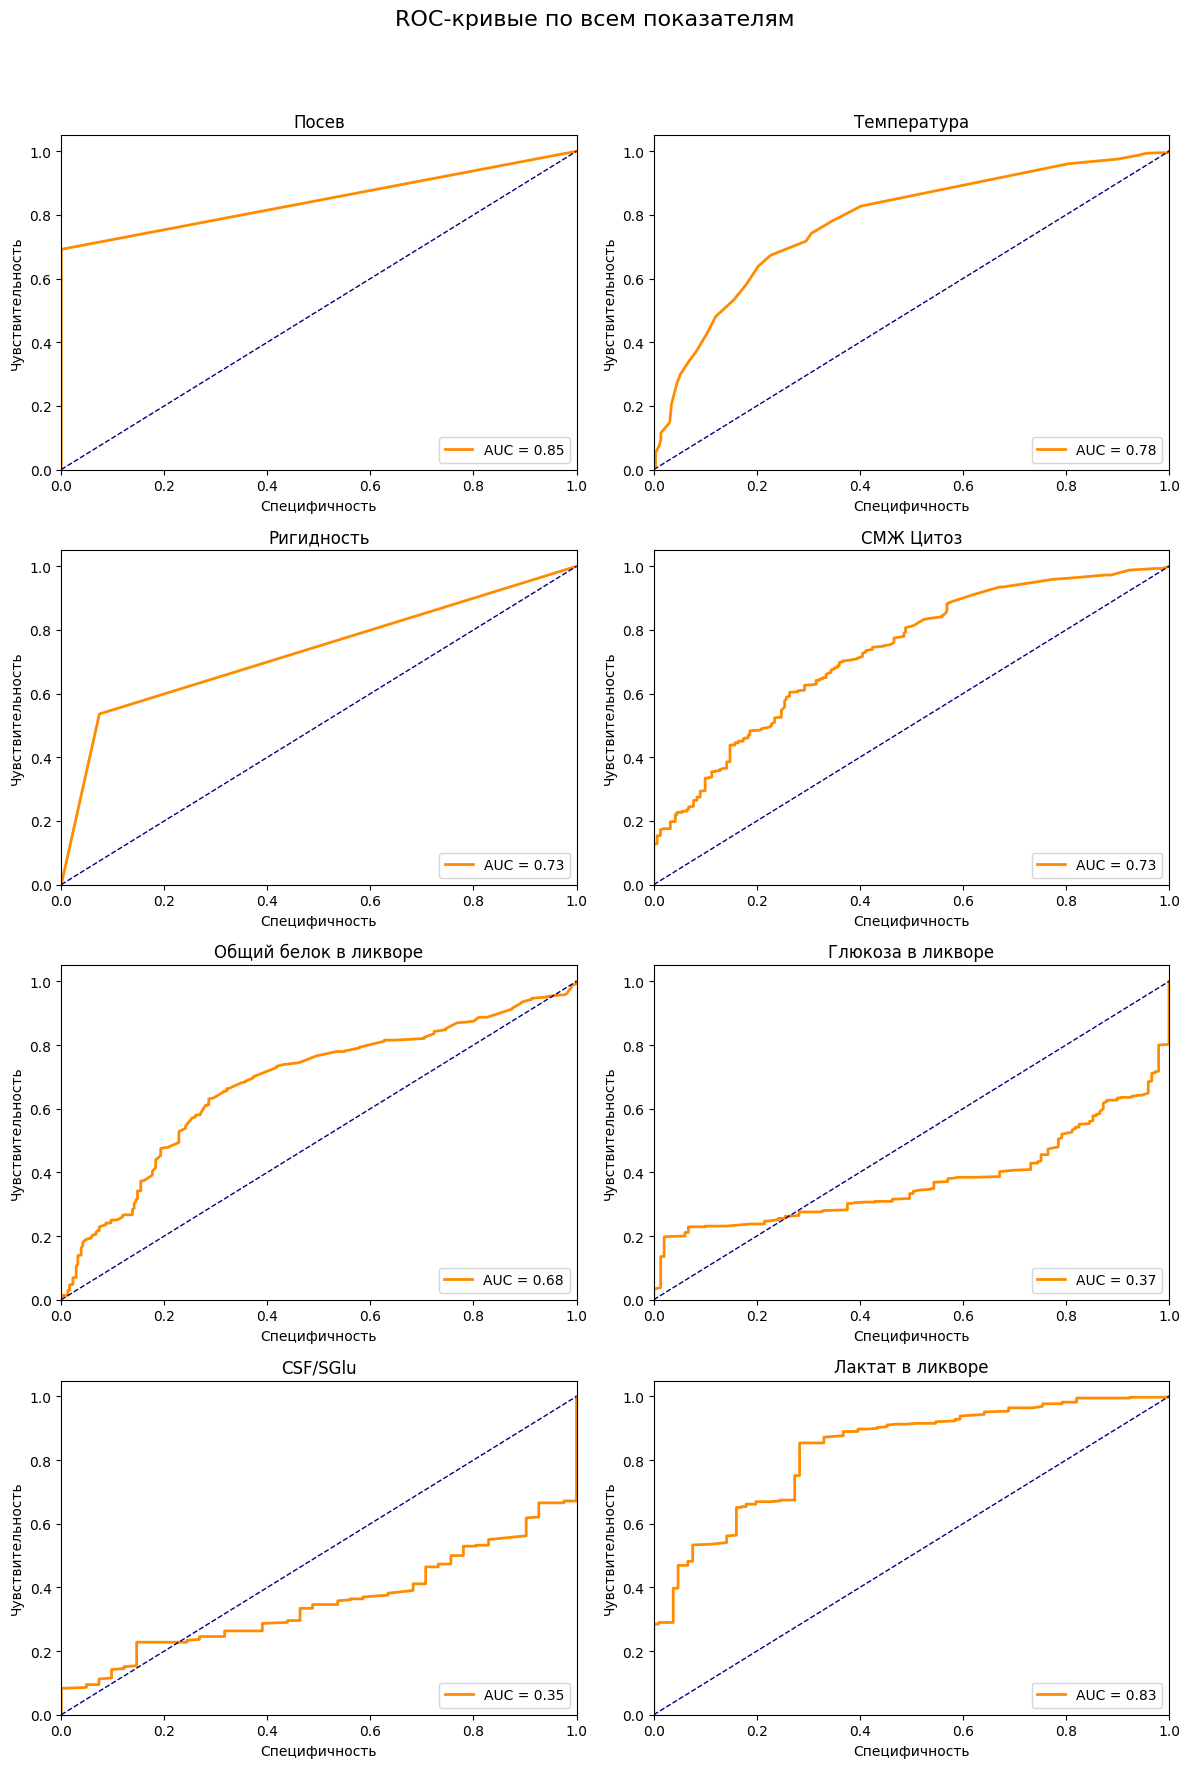

,Критерий,AUC,Оценка AUC,Оптимальное значение
0,Посев,0.85,🟢 Хорошая,1
7,Лактат в ликворе,0.83,🟢 Хорошая,2.8
1,Температура,0.78,🟡 Удовлетворительная,37.1
2,Ригидность,0.73,🟡 Удовлетворительная,1
3,СМЖ Цитоз,0.73,🟡 Удовлетворительная,101
4,Общий белок в ликворе,0.68,🔴 Слабая,0.8
5,Глюкоза в ликворе,0.37,🔴 Слабая,4.5
6,CSF/SGlu,0.35,🔴 Слабая,0.8


In [41]:
# Рисуем ROC кривые и считаем AUC для CDC и Курдюмовой
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Истинные метки
true_labels = (df["infections"] == 2).astype(int)
df["neutrophils_ratio"] = df["csf1_neutrophils"] / df["cytosis_csf"]

# Критерии
criteria = {
    "Посев": df["cultivation"] == 2,
    "Температура": df["temperature"],
    "Ригидность": df["rigidity"] == 2,
    "СМЖ Цитоз": df["cytosis_csf"],
    "Общий белок в ликворе": df["protein_csf"],
    "Глюкоза в ликворе": df["glucose_csf"],
    "CSF/SGlu": df["glucose_ratio"],
    "Лактат в ликворе": df["lactate_csf"]
}

# Таблица результатов
roc_table = []

# Построение графиков
rows = (len(criteria) + 1) // 2
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 4.5 * rows))
fig.suptitle("ROC-кривые по всем показателям", fontsize=16)

for ax, (label, values) in zip(axes.flatten(), criteria.items()):
    scores = values.astype(float)
    valid_idx = ~scores.isna()

    if valid_idx.sum() < 2 or scores[valid_idx].nunique() <= 1:
        ax.set_visible(False)
        continue

    fpr, tpr, thresholds = roc_curve(true_labels[valid_idx], scores[valid_idx])
    roc_auc = auc(fpr, tpr)

    # Оптимальный порог
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    def format_value(val):
        return str(int(val)) if float(val).is_integer() else f"{val:.1f}"

    # График
    ax.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("Специфичность")
    ax.set_ylabel("Чувствительность")
    ax.set_title(label)
    ax.legend(loc="lower right")

    # Сохраняем результат
    roc_table.append({
        "Критерий": label,
        "AUC": round(roc_auc, 2),
        "Оптимальное значение": format_value(optimal_threshold)
    })

# Удаляем пустые оси
for extra_ax in axes.flatten()[len(criteria):]:
    extra_ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Оценка AUC
def auc_quality(value):
    if value >= 0.9:
        return "🔵 Отличная"
    elif value >= 0.8:
        return "🟢 Хорошая"
    elif value >= 0.7:
        return "🟡 Удовлетворительная"
    else:
        return "🔴 Слабая"

# Таблица
roc_df = pd.DataFrame(roc_table)
roc_df["Оценка AUC"] = roc_df["AUC"].apply(auc_quality)

# Перестановка колонок
roc_df = roc_df[["Критерий", "AUC", "Оценка AUC", "Оптимальное значение"]]

# Вывод
display(roc_df.sort_values("AUC", ascending=False))

In [42]:
# Считаем оптимальные значения показателей в отрыве от критериев

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Группировка данных
grouped = df.groupby("history_id").agg({
    "infections": "max",
    "temperature": "max",
    "cytosis_csf": "max",
    "glucose_csf": "min",
    "glucose_ratio": "max",
    "lactate_csf": "max"
}).copy()

# Список анализируемых признаков
features = {
    "Температура": "temperature",
    "СМЖ Цитоз": "cytosis_csf",
    "Глюкоза в ликворе": "glucose_csf",
    "CSF/SGlu": "glucose_ratio",
    "Лактат в ликворе": "lactate_csf"
}

results = []

for name, col in features.items():
    best_score = -1
    best_thresh = None
    best_sens = None
    best_spec = None
    
    values = grouped[col].dropna().unique()
    values = np.sort(values)

    # Пропускаем категориальные или бинарные переменные
    if len(values) < 3:
        continue

    for threshold in values:
        if col == "glucose_csf" or col == "glucose_ratio":
            positive = grouped[col] < threshold
        else:
            positive = grouped[col] > threshold

        predicted = pd.Series(positive, index=grouped.index).astype(int)
        true_labels = (grouped["infections"] == 2).astype(int)

        if predicted.nunique() < 2:
            continue

        tn, fp, fn, tp = confusion_matrix(true_labels, predicted).ravel()
        sens = tp / (tp + fn) if (tp + fn) > 0 else 0
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        score = sens + spec

        if score > best_score:
            best_score = score
            best_thresh = threshold
            best_sens = sens
            best_spec = spec

    if best_thresh is not None:
        # Форматирование значения
        if float(best_thresh).is_integer():
            best_thresh = int(best_thresh)
        else:
            best_thresh = round(float(best_thresh), 1)

        results.append({
            "Критерий": name,
            "Оптимальный порог": best_thresh,
            "Чувствительность (%)": round(best_sens * 100, 1),
            "Специфичность (%)": round(best_spec * 100, 1),
            "Сумма (%)": round((best_sens + best_spec) * 100, 1)
        })

# Вывод таблицы
results_df = pd.DataFrame(results).sort_values("Сумма (%)", ascending=False)
display(results_df)

,Критерий,Оптимальный порог,Чувствительность (%),Специфичность (%),Сумма (%)
1,СМЖ Цитоз,245.0,91.7,78.3,170.0
0,Температура,37.9,71.7,83.3,155.0
4,Лактат в ликворе,2.6,68.3,81.7,150.0
3,CSF/SGlu,1.5,65.0,83.3,148.3
2,Глюкоза в ликворе,2.9,58.3,86.7,145.0
